# Setup

In this tutorial we use the defaul version of the CTGAN:
https://github.com/sdv-dev/CTGAN

We also need to install table evaluator to evaluate the quality of the generated synthetic data.

In [ ]:
%pip install ctgan


In [ ]:
%pip install table_evaluator

Now we download a dataset that includes both continuous and discrete values. I chose a random dataset from Kaggle: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [3]:
!gdown 1cwOlGDM1JG3Nn-SWXBL2Slh5hsiEE_th

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import pandas as pd
data = pd.read_csv('./UNSW_NB15_training-set.csv')
filtered_data = data[(data['attack_cat'] != 'Generic') & (data['attack_cat'] != 'Normal') & (data['attack_cat'] != 'Exploits')].iloc[:2000]


In [4]:
filtered_data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
243,244,0.921987,ospf,-,INT,20,0,1280,0,20.607666,...,1,2,0,0,0,1,1,0,Reconnaissance,1
244,245,0.921987,ospf,-,INT,20,0,1280,0,20.607666,...,1,2,0,0,0,1,1,0,Reconnaissance,1
245,246,0.921987,ospf,-,INT,20,0,1280,0,20.607666,...,1,2,0,0,0,1,1,0,Backdoor,1
246,247,0.921987,ospf,-,INT,20,0,1280,0,20.607666,...,1,2,0,0,0,1,1,0,DoS,1
248,249,0.000009,gre,-,INT,2,0,156,0,111111.107200,...,1,63,0,0,0,1,1,0,Analysis,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3703,3704,1.097267,tcp,-,FIN,12,10,3032,818,19.138459,...,1,3,0,0,0,2,3,0,Fuzzers,1
3704,3705,0.637101,tcp,-,FIN,10,8,564,354,26.683368,...,1,1,0,0,0,1,2,0,Reconnaissance,1
3706,3707,0.481497,tcp,-,FIN,20,8,17266,354,56.075117,...,1,6,0,0,0,2,6,0,Fuzzers,1
3708,3709,1.084268,tcp,-,FIN,12,8,2038,710,17.523343,...,1,3,0,0,0,1,3,0,Fuzzers,1


Next, we define a list with column names for categorical variables. This list will be passed to the model so that the model can decide how to process these fields.

In [5]:
categorical_features = ['id','dur','proto','service','state','spkts','dpkts','sbytes','dbytes','rate','sttl','dttl','sload','dload','sloss','dloss','sinpkt','dinpkt','sjit','djit','swin','stcpb','dtcpb','dwin','tcprtt','synack','ackdat','smean','dmean','trans_depth','response_body_len','ct_srv_src','ct_state_ttl','ct_dst_ltm','ct_src_dport_ltm','ct_dst_sport_ltm','ct_dst_src_ltm','is_ftp_login','ct_ftp_cmd','ct_flw_http_mthd','ct_src_ltm','ct_srv_dst','is_sm_ips_ports','attack_cat','label']

#Model training

Next, we simply define an instance of CTGANSynthesizer and call the fit method with the dataframe and the list of categorical variables.

We train the model for 300 epochs only as the discriminator and generator loss becomes quite low after these many epochs.

In [6]:
from ctgan import CTGAN

ctgan = CTGAN(verbose=True)
ctgan.fit(filtered_data, categorical_features)

Gen. (-0.58) | Discrim. (0.35):   9%|▊         | 26/300 [20:06<3:31:55, 46.41s/it] 


KeyboardInterrupt: 

#Synthetic data generation

In [18]:
samples = ctgan.sample(1000)

In [19]:
samples

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1930,0.201833,sprite-rpc,-,FIN,18,16,574,882,88.182625,...,1,5,0,0,0,15,2,0,Fuzzers,1
1,1786,1.287986,tcp,http,FIN,10,8,564,354,30.773587,...,1,1,0,0,1,1,1,0,Fuzzers,1
2,3663,2.112844,tcp,-,FIN,10,12,188,2092,32.062998,...,1,4,0,0,0,1,1,0,DoS,1
3,1562,0.789636,tcp,http,FIN,10,8,2032,354,5.333085,...,1,1,0,0,1,1,1,0,DoS,1
4,2588,1.470304,tcp,-,FIN,12,226,27374,678,37.438997,...,1,5,0,0,0,3,12,0,DoS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2147,35.181515,tcp,-,FIN,10,8,1112,642,83.768823,...,1,1,0,0,0,1,3,0,Reconnaissance,1
996,2552,0.000009,unas,-,INT,2,0,200,0,111111.107200,...,1,6,0,0,0,4,6,0,DoS,1
997,977,0.844596,tcp,-,FIN,10,6,738,354,74.158211,...,1,1,0,0,0,1,1,0,Reconnaissance,1
998,1594,1.354252,tcp,http,FIN,12,8,564,354,21.700656,...,1,1,0,0,0,1,1,0,Fuzzers,1


#Evaluation

IPython not installed.
(82332, 45) (1000, 45)


ValueError: min() arg is an empty sequence

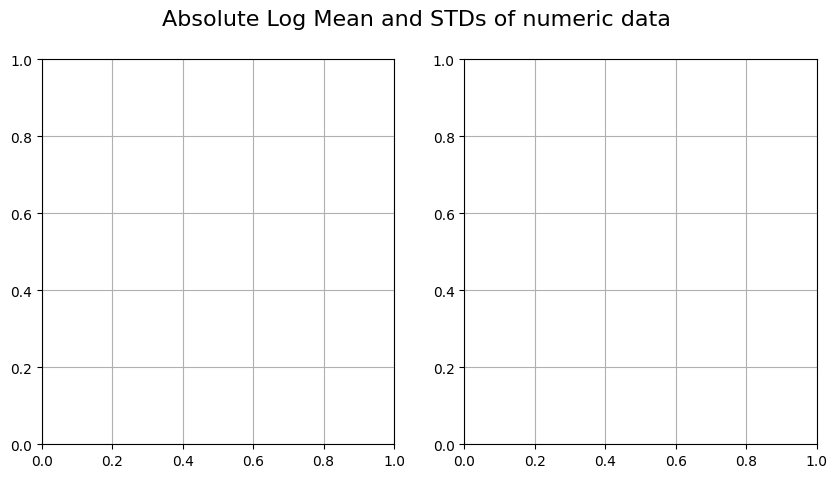

In [20]:
from table_evaluator import TableEvaluator

print(data.shape, samples.shape)
table_evaluator =  TableEvaluator(data, samples, cat_cols= categorical_features)

table_evaluator.visual_evaluation()